# Task 2 - Predict Customer Buying Behavior

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
# Check Null Values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [5]:
# Check duplicate rows from data set
df.duplicated().sum()

719

In [6]:
# Booking Counts
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [7]:
# Remove duplicate rows from data set
df.drop_duplicates(inplace=True)

In [8]:
# Shape of Dataset after duplication removal
df.shape

(49281, 14)

In [9]:
# Bookings counts after duplication removal
df.booking_complete.value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

## Mutual Information

In [10]:
from sklearn.preprocessing import LabelEncoder

# create a copy of the original data frame
df_encoded = df.copy()

# iterate over columns with object dtype
for colname in df.select_dtypes("object"):
    
    # initialize a label encoder object
    le = LabelEncoder()
    
    # fit the encoder on the column and transform it
    df_encoded[colname] = le.fit_transform(df[colname])
    
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  int32  
 2   trip_type              49281 non-null  int32  
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  int32  
 7   route                  49281 non-null  int32  
 8   booking_origin         49281 non-null  int32  
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int32(5), int64(8)
memory usage: 4.7 MB

In [11]:
# Split Features and Target Variable
X_features = df_encoded.drop('booking_complete', axis=1)
y_target = df_encoded['booking_complete']

In [12]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_features, y_target, random_state=123)

# Features with their scores
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_features.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

route                    0.053550
booking_origin           0.045653
flight_duration          0.016526
length_of_stay           0.010146
wants_extra_baggage      0.009184
trip_type                0.007592
wants_in_flight_meals    0.003282
wants_preferred_seat     0.002818
flight_hour              0.002115
flight_day               0.001674
num_passengers           0.000727
sales_channel            0.000533
purchase_lead            0.000193
Name: MI Scores, dtype: float64

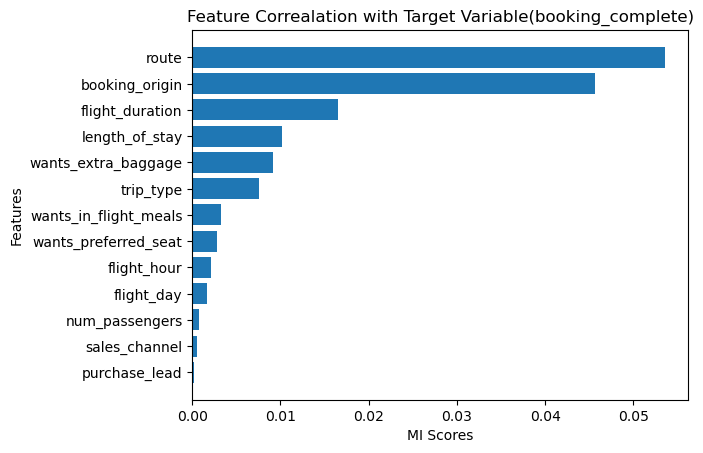

<Figure size 800x800 with 0 Axes>

In [13]:
# plot the MI scores
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Feature Correalation with Target Variable(booking_complete)")
plt.ylabel("Features")
plt.xlabel("MI Scores")
plt.figure(dpi=100, figsize=(8, 8))
plt.show()

In [14]:
# Target Variable Counts
df.booking_complete.value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

#### The dataset is imbalanced, with 6 times more instances of booking not completed than of booking completed. To address this, we will perform undersampling to balance the data.

In [15]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(df.drop('booking_complete',axis=1), df.booking_complete)

# Shapes of resampled data set
print(X_resampled.shape)
print(y_resampled.shape)

(14782, 13)
(14782,)


In [16]:
X_resampled

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,7,83,16,Tue,AKLKUL,Malaysia,1,0,1,8.83
1,2,Internet,RoundTrip,51,35,6,Sun,ICNSYD,South Korea,0,0,0,8.58
2,1,Mobile,RoundTrip,151,1,8,Tue,ICNOOL,South Korea,1,1,1,8.83
3,2,Internet,RoundTrip,77,6,5,Thu,ICNSYD,South Korea,0,0,0,8.58
4,2,Internet,RoundTrip,270,3,0,Sun,HNDLGK,Japan,0,0,0,7.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14777,1,Internet,RoundTrip,33,6,6,Wed,PENTPE,Taiwan,1,1,0,4.67
14778,2,Internet,RoundTrip,15,6,16,Tue,PENTPE,Malaysia,1,1,1,4.67
14779,4,Internet,RoundTrip,242,6,9,Tue,PENXIY,Malaysia,1,0,1,5.00
14780,2,Internet,RoundTrip,7,6,4,Wed,PERPNH,Australia,0,0,0,5.62


In [17]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
14777    1
14778    1
14779    1
14780    1
14781    1
Name: booking_complete, Length: 14782, dtype: int64

In [18]:
# Normalize the data set
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

In [19]:
# Train Test data split
from sklearn.model_selection import train_test_split
   
# one hot encoding
X = pd.get_dummies(X_resampled)
X = scale(X)
y = y_resampled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Model Building
----
### 1. Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=1000, min_samples_split=100, random_state=0, max_depth=None)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Predict on the test data
y_pred = rfc.predict(X_test)

# Actual Values on test data
y_actual = y_test.values

print('                      Random Forest Results')
print(classification_report(y_actual, y_pred))

                      Random Forest Results
              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1461
           1       0.71      0.77      0.74      1496

    accuracy                           0.73      2957
   macro avg       0.73      0.73      0.73      2957
weighted avg       0.73      0.73      0.73      2957



In [21]:
# Model Accuracy & Score
print('ACCURACY: ',round(accuracy_score(y_actual,y_pred)*100,2))
print('AUC score: ',round(roc_auc_score(y_actual,y_pred),6))

ACCURACY:  72.74
AUC score:  0.726892


### 2. Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree
dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Predict on the test data
y_pred = dt.predict(X_test)

# Actual Values on test data
y_actual = y_test.values

print('                      Decision Tree Results')
print(classification_report(y_actual, y_pred))

                      Decision Tree Results
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1461
           1       0.65      0.62      0.63      1496

    accuracy                           0.64      2957
   macro avg       0.64      0.64      0.64      2957
weighted avg       0.64      0.64      0.64      2957



In [23]:
# Model Accuracy & Score
print('ACCURACY: ',round(accuracy_score(y_actual,y_pred)*100,2))
print('AUC score: ',round(roc_auc_score(y_actual,y_pred),6))

ACCURACY:  63.65
AUC score:  0.636609


### 3. XGBoost

In [24]:
from xgboost import XGBClassifier

# Create XGB Classifier
xgb_model = XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Actual Values on test data
y_actual = y_test.values

print('                      XGB Results')
print(classification_report(y_actual, y_pred))

                      XGB Results
              precision    recall  f1-score   support

           0       0.74      0.69      0.71      1461
           1       0.71      0.76      0.74      1496

    accuracy                           0.72      2957
   macro avg       0.73      0.72      0.72      2957
weighted avg       0.73      0.72      0.72      2957



In [25]:
# Model Accuracy & Score
print('ACCURACY: ',round(accuracy_score(y_actual,y_pred)*100,2))
print('AUC score: ',round(roc_auc_score(y_actual,y_pred),6))

ACCURACY:  72.47
AUC score:  0.724282


### 4. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression Model
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = lr.predict(X_test)

# Actual Values on test data
y_actual = y_test.values

print('                      Logistic Regression Results')
print(classification_report(y_actual, y_pred))

                      Logistic Regression Results
              precision    recall  f1-score   support

           0       0.69      0.68      0.69      1461
           1       0.70      0.71      0.70      1496

    accuracy                           0.70      2957
   macro avg       0.70      0.70      0.70      2957
weighted avg       0.70      0.70      0.70      2957



In [27]:
# Model Accuracy & Score
print('ACCURACY: ',round(accuracy_score(y_actual,y_pred)*100,2))
print('AUC score: ',round(roc_auc_score(y_actual,y_pred),6))

ACCURACY:  69.53
AUC score:  0.695157


### 5. K-Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Create K-Neighbor Classifier Model
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = knn.predict(X_test)

# Actual Values on test data
y_actual = y_test.values

print('                      KNN Results')
print(classification_report(y_actual, y_pred))

                      KNN Results
              precision    recall  f1-score   support

           0       0.56      0.57      0.57      1461
           1       0.57      0.56      0.57      1496

    accuracy                           0.57      2957
   macro avg       0.57      0.57      0.57      2957
weighted avg       0.57      0.57      0.57      2957



In [29]:
# Model Accuracy & Score
print('ACCURACY: ',round(accuracy_score(y_actual,y_pred)*100,2))
print('AUC score: ',round(roc_auc_score(y_actual,y_pred),6))

ACCURACY:  56.81
AUC score:  0.568207


### 6. Support Vector Machine (SVM)

In [30]:
from sklearn.svm import SVC

# Create SVM Model
svm = SVC()

# Fit the model on the training data
svm.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = svm.predict(X_test)

# Actual Values on test data
y_actual = y_test.values

print('                      SVM Results')
print(classification_report(y_actual, y_pred))

                      SVM Results
              precision    recall  f1-score   support

           0       0.60      0.49      0.54      1461
           1       0.58      0.67      0.62      1496

    accuracy                           0.59      2957
   macro avg       0.59      0.58      0.58      2957
weighted avg       0.59      0.59      0.58      2957



In [31]:
# Model Accuracy & Score
print('ACCURACY: ',round(accuracy_score(y_actual,y_pred)*100,2))
print('AUC score: ',round(roc_auc_score(y_actual,y_pred),6))

ACCURACY:  58.54
AUC score:  0.584324


### 7. Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting Model
gb = GradientBoostingClassifier()

# Fit the model on the training data
gb.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = gb.predict(X_test)

# Actual Values on test data
y_actual = y_test.values

print('                      Gradient Boosting Results')
print(classification_report(y_actual, y_pred))

                      Gradient Boosting Results
              precision    recall  f1-score   support

           0       0.74      0.66      0.69      1461
           1       0.70      0.77      0.73      1496

    accuracy                           0.71      2957
   macro avg       0.72      0.71      0.71      2957
weighted avg       0.72      0.71      0.71      2957



In [33]:
# Model Accuracy & Score
print('ACCURACY: ',round(accuracy_score(y_actual,y_pred)*100,2))
print('AUC score: ',round(roc_auc_score(y_actual,y_pred),6))

ACCURACY:  71.46
AUC score:  0.713911
